# Estadistica Descriptiva.

1-Tipos de datos

2- Pipe line de procesamiento

3- Anlisis exploraotorio, estadistica descriptiva, correlaciones, reduccion de datos.

4- Probabilidad e inferencia.

5- Test de hipotesis.


¿Cuáles serán los puntos específicos que vamos a tratar en este curso?
999
Primera parte del curso: Vamos a abordar cuales son los elementos de estadística la descriptiva para la ingesta y el procesamiento de los datos.
.

888
Segunda parte del curso: Vamos a ver análisis exploratorio de los datos, identificar correlaciones de los datos, abordaremos si a partir de eso podemos reducir el conjunto de datos que necesitamos para un modelo, por ejemplo. Entonces, el objetivo es abordar los estadísticos para exploración y analítica.

## Tipos de datos

#### Categoricos.

(genero,categoria de pelicula, metodo de pago)
-> ordinal
-> nominal



#### Numericos

(Edad,altura,temperatura)

-> discretos
-> continuos

In [2]:
import pandas as pd

In [3]:
data_cars = pd.read_csv('./cars.csv')
data_cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [4]:
#Estadistica descriptiva rapida en pandas.
data_cars.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


## Medidas de tendencia central.

-> Media(Promedio)

-> Mediana(Dato central)

-> Moda(Dato que mas se repite)



## Diagrama de frecuencias.
![Alt text](2023-02-15_09h18_18.png)


## ¿Cuando usar cual?

-> La media es susceptible a valores atipicos.

-> La moda no aplica para datos numericos continuos.


## Metafora de Bill Gates en un bar.

![Alt text](2023-02-15_09h22_52.png)
![Alt text](2023-02-15_09h26_02.png)

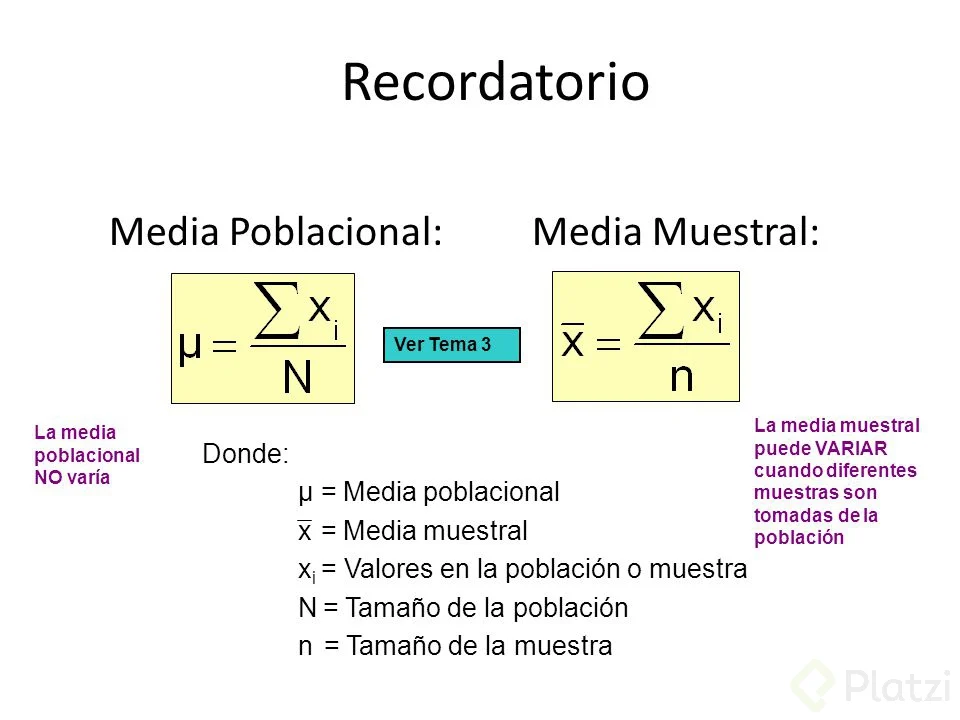

La media y/o promedio se ve mas sesgado por valores atipicos que la mediana.

## Medidas de tendencia central en python.

![Alt text](2023-02-15_09h34_25.png)

In [8]:
#Media en el precio de autos.
data_cars['price_usd'].mean()


6639.971021255613

In [10]:
#Mediana en el precio de autos.

data_cars['price_usd'].median()

4800.0

<AxesSubplot: ylabel='Frequency'>

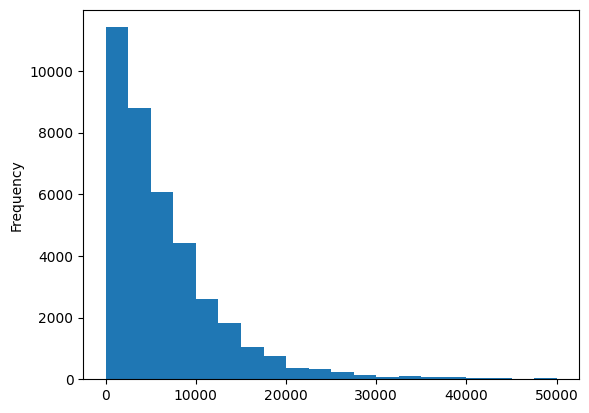

In [13]:
#Histograma en precios de autos con pandas.
data_cars['price_usd'].plot.hist(bins=20)

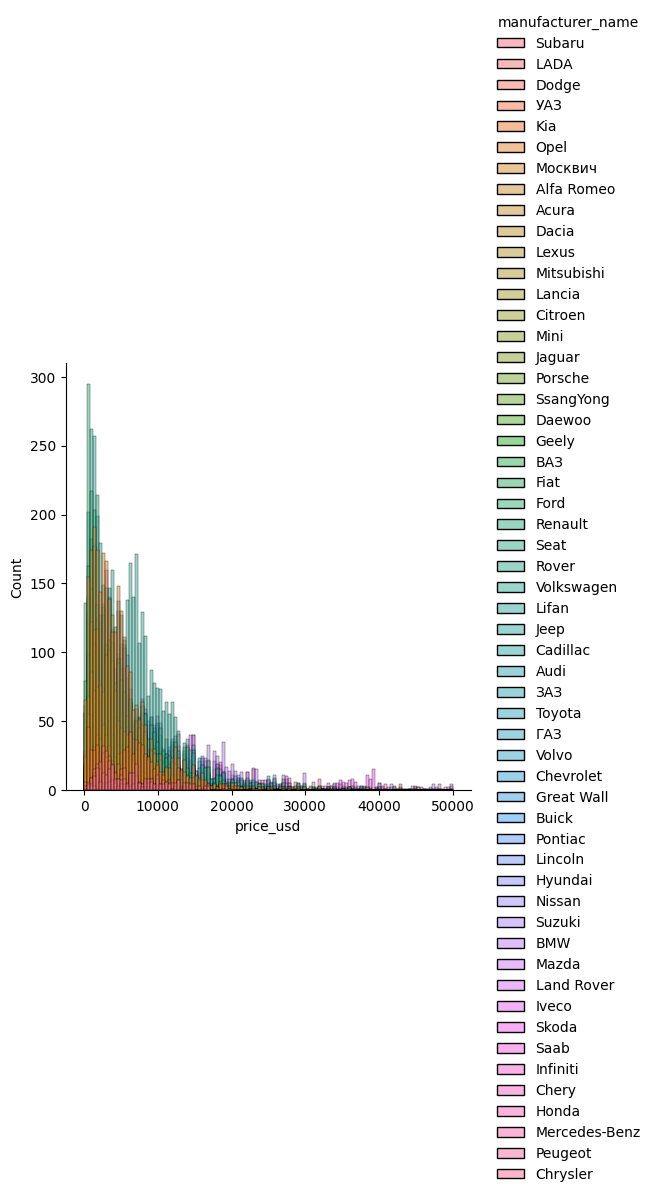

In [14]:
import seaborn as sns
sns.displot(
    data_cars,
    x = 'price_usd',
    hue = 'manufacturer_name')

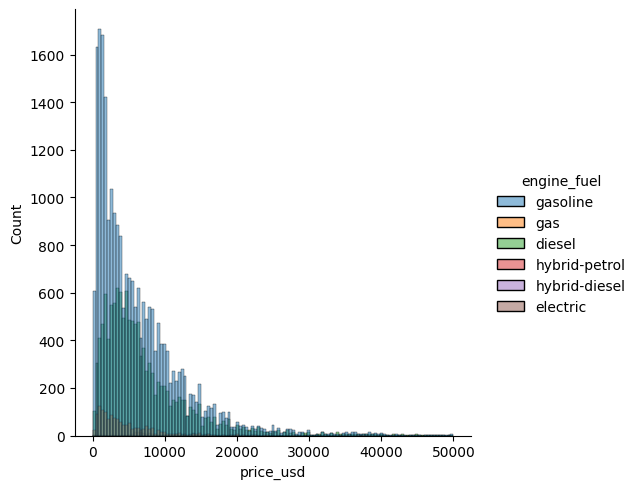

In [17]:
sns.displot(
    data_cars,
    x = 'price_usd',
    hue = 'engine_fuel')

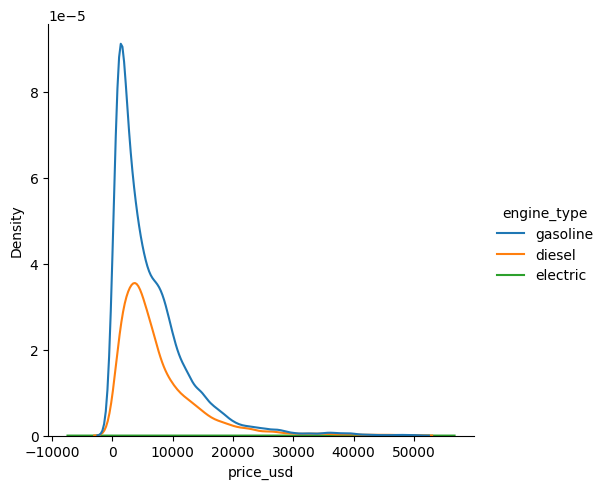

In [20]:
sns.displot(
    data_cars,
    x = 'price_usd',
    hue = 'engine_type',
    kind = 'kde'
)

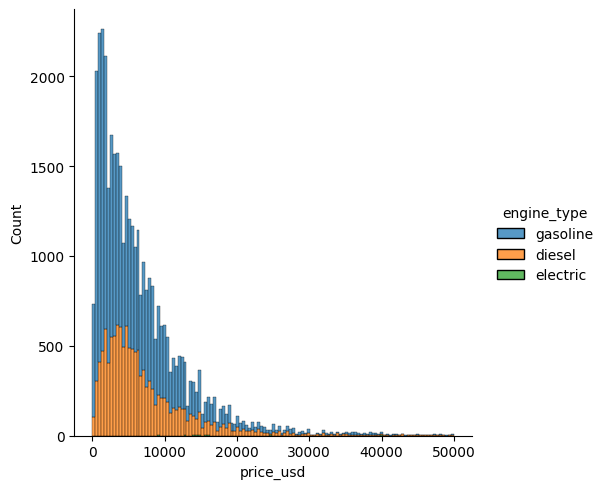

In [21]:
sns.displot(
    data_cars,
    x = 'price_usd',
    hue = 'engine_type',
    multiple = 'stack'
    
)

In [22]:
#Contar el numero de datos.
data_cars.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


In [24]:
#Filtrar por autos audi.
Q7_df = data_cars[(data_cars['manufacturer_name'] == 'Audi') & (data_cars['model_name'] == 'Q7')]
Q7_df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
19515,Audi,Q7,automatic,grey,275000,2007,diesel,False,diesel,3.0,...,False,False,False,False,False,False,False,False,False,21
19547,Audi,Q7,automatic,white,105000,2014,diesel,False,diesel,3.0,...,True,True,True,True,True,True,True,True,True,216
19559,Audi,Q7,automatic,other,170000,2006,diesel,False,diesel,3.0,...,True,True,True,True,True,False,True,False,True,24
19574,Audi,Q7,automatic,black,185000,2016,diesel,False,diesel,3.0,...,False,False,True,True,True,True,True,True,True,7
19583,Audi,Q7,automatic,other,210000,2010,diesel,False,diesel,4.2,...,True,True,True,False,True,True,True,True,True,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21756,Audi,Q7,automatic,silver,200000,2008,gasoline,False,gasoline,3.6,...,True,True,True,True,True,True,True,True,True,91
21812,Audi,Q7,automatic,black,276000,2008,diesel,False,diesel,4.2,...,True,True,True,True,True,True,True,True,True,115
21873,Audi,Q7,automatic,black,273000,2006,gasoline,False,gasoline,4.2,...,True,True,False,True,True,True,True,False,True,147
21900,Audi,Q7,automatic,white,283000,2007,diesel,False,diesel,4.2,...,True,True,True,True,True,True,True,True,True,159


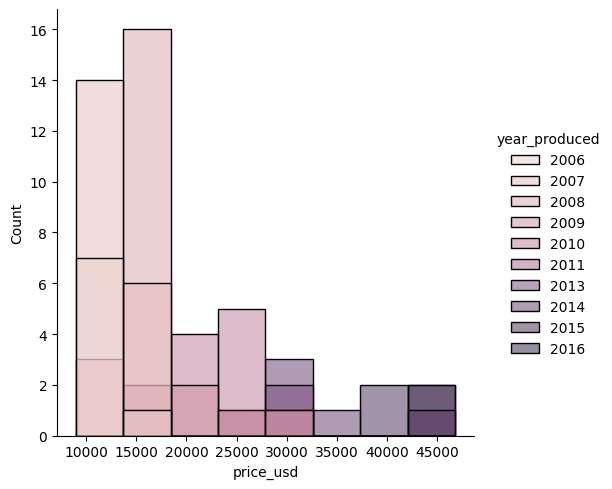

In [27]:
sns.displot(Q7_df,x = 'price_usd', hue = 'year_produced')

In [43]:
#Filtrar ford mustang

BMW_df = data_cars[(data_cars['manufacturer_name'] == 'BMW') & (data_cars['model_name'] == 'X6')]
BMW_df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
27502,BMW,X6,automatic,red,127000,2015,diesel,False,diesel,3.0,...,True,True,True,True,True,True,True,True,True,95
27514,BMW,X6,automatic,white,94635,2012,gasoline,False,gasoline,3.0,...,False,True,True,True,True,True,True,True,True,84
27536,BMW,X6,automatic,black,277000,2009,diesel,False,diesel,3.5,...,False,True,True,True,True,True,True,False,True,9
27594,BMW,X6,automatic,blue,156000,2010,hybrid-petrol,False,gasoline,4.4,...,True,True,True,True,True,True,True,True,True,90
27595,BMW,X6,automatic,black,210000,2011,diesel,False,diesel,3.0,...,True,True,True,True,True,True,True,True,True,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29856,BMW,X6,automatic,black,157000,2010,gasoline,False,gasoline,3.5,...,True,True,True,True,True,False,True,True,True,88
29967,BMW,X6,automatic,blue,94000,2015,diesel,False,diesel,3.0,...,True,True,True,True,True,True,True,True,True,137
30037,BMW,X6,automatic,blue,149000,2008,gasoline,False,gasoline,3.0,...,True,True,True,True,True,True,True,True,True,171
30040,BMW,X6,automatic,white,116000,2010,gasoline,False,gasoline,3.5,...,True,True,True,True,True,True,True,True,True,172


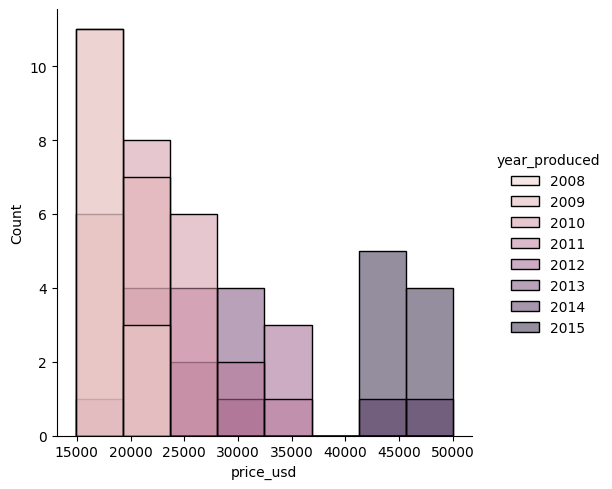

In [45]:
sns.displot(BMW_df,x = 'price_usd', hue ='year_produced')

# Medidas de dispersión

## Rango
![Alt text](2023-02-15_22h00_30.png)


Medidas de dispersión
Rango: El Rango es el intervalo entre el valor máximo y el valor mínimo.

Cuartiles: Los cuartiles son valores que dividen una muestra de datos en cuatro partes iguales.

1er cuartil (Q1): 25% de los datos es menor que o igual a este valor.

2do cuartil (Q2): La mediana. 50% de los datos es menor que o igual a este valor.

3er cuartil (Q3): 75% de los datos es menor que o igual a este valor.

Rango intercuartil: La distancia entre el primer 1er cuartil y el 3er cuartil (Q3-Q1); de esta manera, abarca el 50% central de los datos.
Diagrama de caja o box plot: representa gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, el diagrama de caja muestra a simple vista la mediana y los cuartiles de los datos. También puede representar los valores atípicos de estos.

# Desviación estandar.


La desviación estándar es la medida de dispersión más común, que indica qué tan dispersos están los datos con respecto a la media. Mientras mayor sea la desviación estándar, mayor será la dispersión de los datos.
El símbolo σ (sigma) se utiliza frecuentemente para representar la desviación estándar de una población, mientras que s se utiliza para representar la desviación estándar de una muestra.
La desviación estándar se puede utilizar para establecer un valor de referencia para estimar la variación general de un proceso.

![Alt text](2023-02-15_22h07_35.png)

## Distribucion normal.
![Alt text](https://vscode-remote%2Bwsl-002bubuntu-002d22-002e04.vscode-resource.vscode-cdn.net/home/jann/Platzi/DataScience/EstadisticaDescriptiva/2023-02-15_22h15_40.png?version%3D1676517351265)


![Alt text](2023-02-15_22h18_55.png)

# Medidas de dispersión en python.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cars = pd.read_csv('cars.csv')

df_cars


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [2]:
# Calculando la desviacion estandar
df_cars['price_usd'].std()

6428.1520182029035

In [6]:
#Calcular el rango.

rango = df_cars['price_usd'].max() - df_cars['price_usd'].min()
rango

49999.0

In [13]:
# Quartiles.
median = df_cars['price_usd'].median()
Q1 = df_cars['price_usd'].quantile(q = 0.25)
Q3 = df_cars['price_usd'].quantile(q = 0.75)
min_val = df_cars['price_usd'].quantile(q = 0)
max_val = df_cars['price_usd'].quantile(q = 1.0)

print(f'Valor minimo = {min_val}, Rango Q1 = {Q1} , Mediana = {median}, Rango Q3 = {Q3},valor maximo = {max_val}')


Valor minimo = 1.0, Rango Q1 = 2100.0 , Mediana = 4800.0, Rango Q3 = 8990.0,valor maximo = 50000.0


In [14]:
#Rango intercuartil.

iqr = Q3 - Q1
iqr

6890.0

<AxesSubplot: xlabel='price_usd', ylabel='Count'>

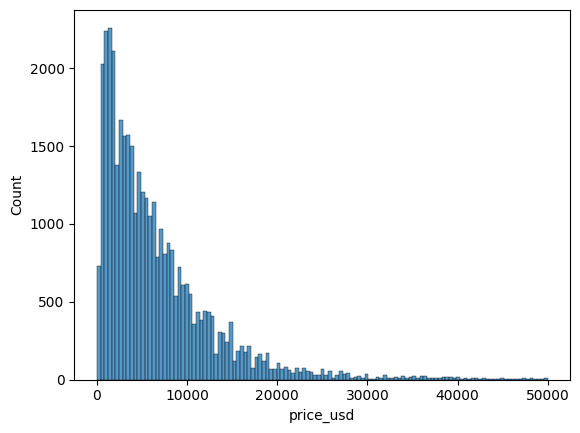

In [15]:
sns.histplot(df_cars, x = 'price_usd')

<AxesSubplot: >

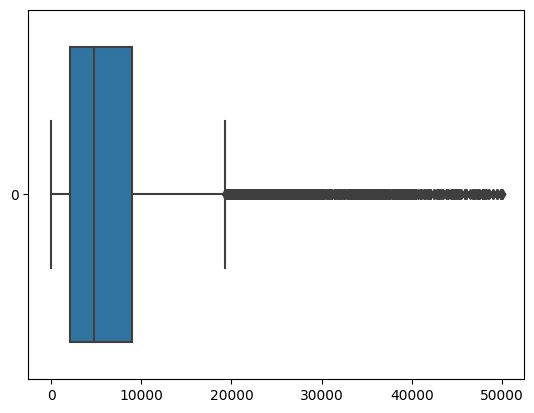

In [19]:
sns.boxplot(df_cars['price_usd'],orient= 'h')

<AxesSubplot: xlabel='engine_fuel', ylabel='price_usd'>

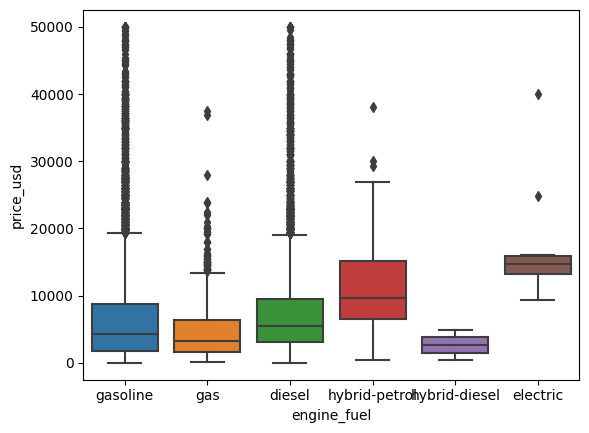

In [22]:
sns.boxplot(data = df_cars,
            x = 'engine_fuel',
            y = 'price_usd')


Asimetría en distribuciones
Como vimos en la clase, el hecho de que nuestra distribución tenga una tendencia a la derecha o a izquierda nos representa un problema, ya que no a acorde con una distribución y eso puede afectar a nuestros análisis si no tomamos en cuenta ese sesgo. No siempre hay que confiar en nuestra intuición o lo que vemos a simple vista, hay métodos como:

Primer coeficiente de asimetría de Pearson (asimetría de modo)
Segundo coeficiente de asimetría de Pearson (asimetría mediana)
Coeficiente de Groeneveld y Meeden
Coeficiente de Fisher
Por mencionar algunos.
.

Y por último, no hay que olvidar la curtosis:
Una curtosis grande implica una mayor concentración de valores de la variable tanto muy cerca de la media de la distribución (pico) como muy lejos de ella (colas), al tiempo que existe una relativamente menor frecuencia de valores intermedios. Esto explica una forma de la distribución de frecuencias/probabilidad con colas más gruesas, con un centro más apuntado y una menor proporción de valores intermedios entre el pico y colas.
Una mayor curtosis no implica una mayor varianza, ni viceversa.

![Alt text](2023-02-15_22h44_05.png)

# Data Viz Project.
2 PAGINAS PARA MEJORAR NUESTRA VISUALIZACION DE DATOS.
- https://www.data-to-viz.com/
- https://datavizproject.com/

## Scatter Plot o Digrama de dispersión. 

In [24]:
df_iris = sns.load_dataset('iris')
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<AxesSubplot: xlabel='sepal_length', ylabel='petal_length'>

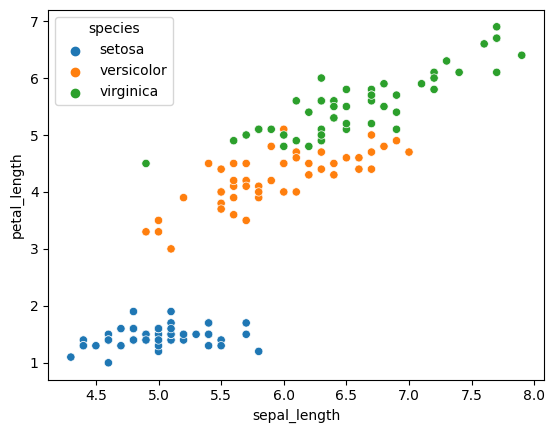

In [26]:
# scatterplot.
sns.scatterplot(df_iris,x = 'sepal_length',y = 'petal_length',hue = 'species')

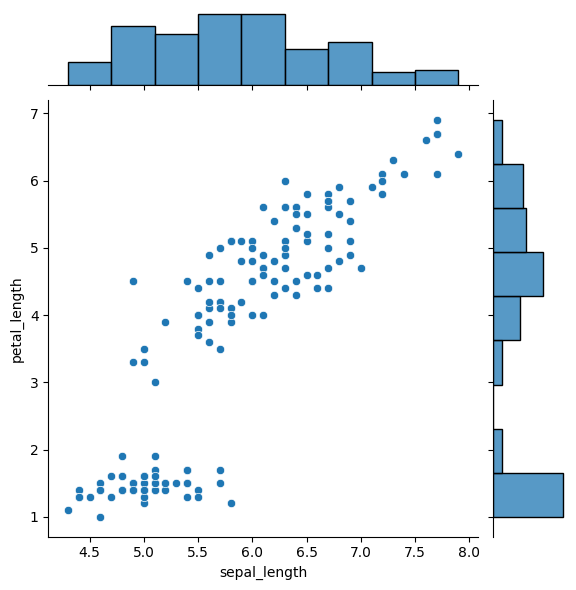

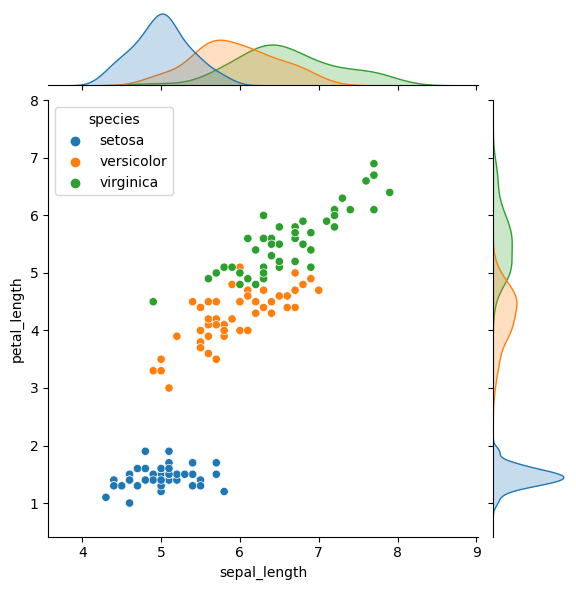

In [30]:
#Jointplot as the same of scartterplot but its show the histogram in the limits.
sns.jointplot(data = df_iris,x = 'sepal_length',y = 'petal_length')
sns.jointplot(data = df_iris,x = 'sepal_length',y = 'petal_length',hue = 'species')

<AxesSubplot: xlabel='species', ylabel='petal_length'>

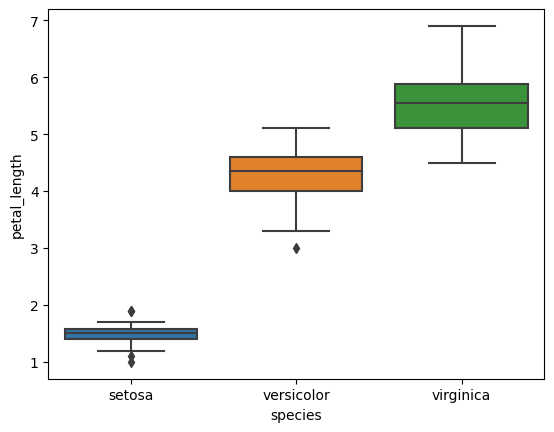

In [32]:
#Boxplot
sns.boxplot(df_iris,x = 'species',y = 'petal_length')

<AxesSubplot: xlabel='species', ylabel='petal_length'>

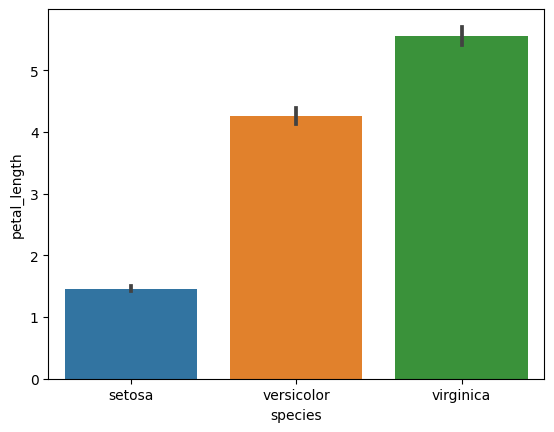

In [41]:
#barplot.
sns.barplot(data = df_iris,x = 'species', y ='petal_length')

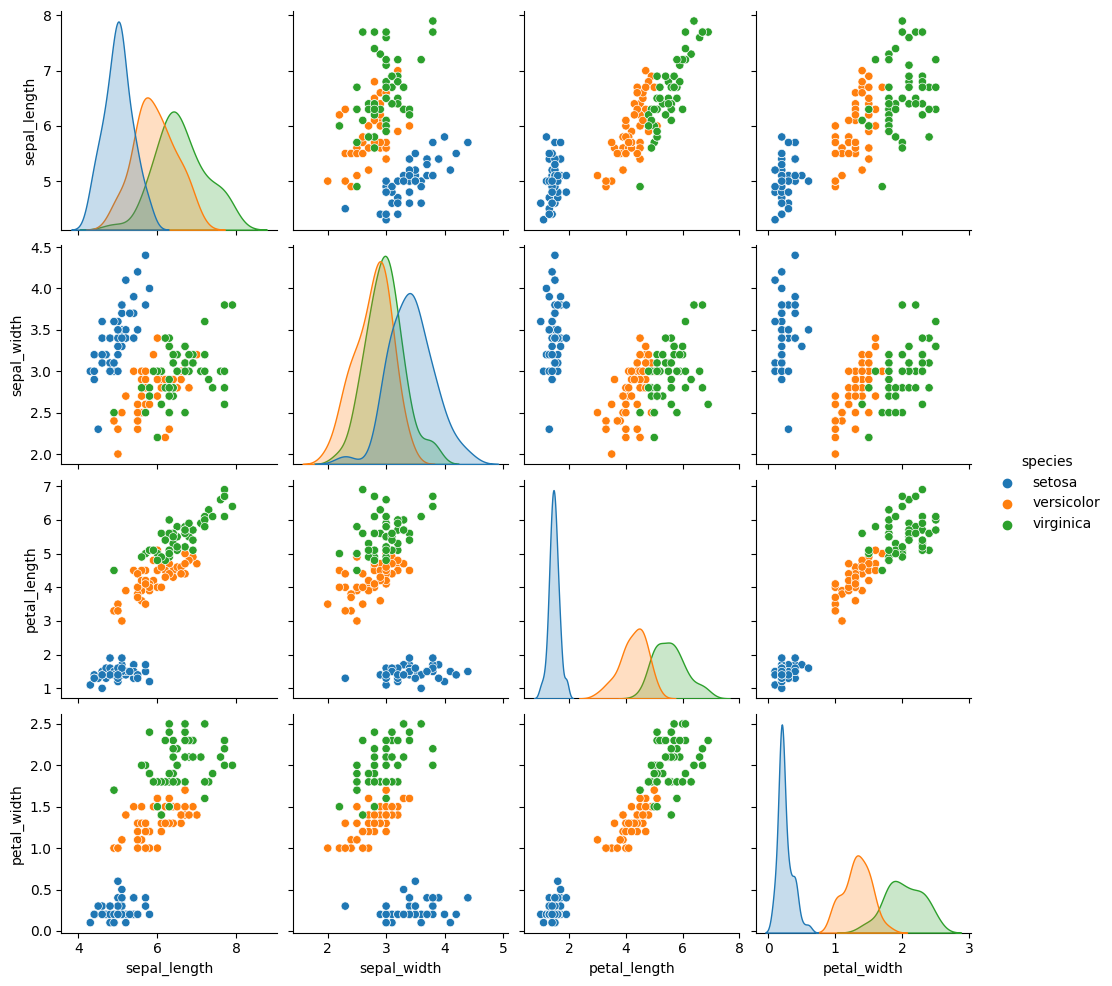

In [42]:
sns.pairplot(data =df_iris, hue= 'species')

In [54]:
print("petal_length")
print(df_iris['petal_length'].std())

print()
print("petal_width")
print(df_iris['petal_width'].std())

print()
print('sepal_length')
print(df_iris['sepal_length'].std())

print()
print('sepal_width')
print(df_iris['sepal_width'].std())

print()
print('std')
print(df_iris.groupby('species')['sepal_length'].std())
print()
print('mean')
df_iris.groupby('species')['sepal_length'].mean()


petal_length
1.7652982332594662

petal_width
0.7622376689603465

sepal_length
0.828066127977863

sepal_width
0.4358662849366982
std
species
setosa        0.352490
versicolor    0.516171
virginica     0.635880
Name: sepal_length, dtype: float64

mean


species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

# Pipelines de procesamiento de datos numericos.

### Escalamiento lineal

¿Por que usarlo?.

-> Modelos de machine learning eficientes en el rango [-1,1]

¿Hay diferentes tipos?

-> max - min, Clipping, Z-core, Winsorinzing, etc.

¿Cuándo usarlos?

-> Data simétrica o uniformemente distribuida.

Normalización
La normalización es una técnica que a menudo se aplica como parte de la preparación de datos para el aprendizaje automático. El objetivo de la normalización es cambiar los valores de las columnas numéricas en el conjunto de datos para usar una escala común, sin distorsionar las diferencias en los rangos de valores ni perder información. La normalización también es necesaria para que algunos algoritmos modelen los datos correctamente.
.
Por ejemplo, suponga que su conjunto de datos de entrada contiene una columna con valores que van de 0 a 1 y otra columna con valores que van de 10,000 a 100,000. La gran diferencia en la escala de los números podría causar problemas al intentar combinar los valores como características durante el modelado.
.
La normalización evita estos problemas al crear nuevos valores que mantienen la distribución general y las proporciones en los datos de origen, mientras mantienen los valores dentro de una escala aplicada en todas las columnas numéricas utilizadas en el modelo.
.

Tenemos varias opciones para transformar datos numéricos:
Cambiar todos los valores a una escala de 0 a 1 o transformar los valores representándolos como rangos de percentiles en lugar de valores absolutos.
Aplicar la normalización a una sola columna o a varias columnas en el mismo conjunto de datos.
Si necesita repetir el experimento o aplicar los mismos pasos de normalización a otros datos, puede guardar los pasos como una transformación de normalización y aplicarlos a otros conjuntos de datos que tengan el mismo esquema.
Nota importante: Algunos algoritmos requieren que los datos se normalicen antes de entrenar un modelo. Otros algoritmos realizan su propia normalización o escalado de datos.

Normalización lineal
Algunos de los tipos:
.

Zscore : convierte todos los valores en una puntuación z. Los valores de la columna se transforman mediante la siguiente fórmula:
z score
La media y la desviación estándar se calculan para cada columna por separado. Se utiliza la desviación estándar de la población.

.

MinMax : el normalizador min-max cambia la escala linealmente cada característica al intervalo [0,1]. El cambio de escala al intervalo [0,1] se realiza cambiando los valores de cada característica para que el valor mínimo sea 0, y luego dividiendo por el nuevo valor máximo (que es la diferencia entre los valores máximo y mínimo originales). Los valores de la columna se transforman mediante la siguiente fórmula:
min max
.
¿Cuándo usar la normalización lineal?
En datos simétricos o en datos uniformemente distribuidos.

![Alt text](2023-02-16_22h10_52.png)

# Transformacion no lineal.

 Estadistica en la ingesta de datos.

-> ¿Por qué usarlos?.

Datos fuertemente sesgados, no simetricos.

-> ¿Hay diferencia tipos?

Logaritmos, sigmoides, polinomiales, etc.

-> ¿Cuando usarlos?

Antes de escalamientos lienales.


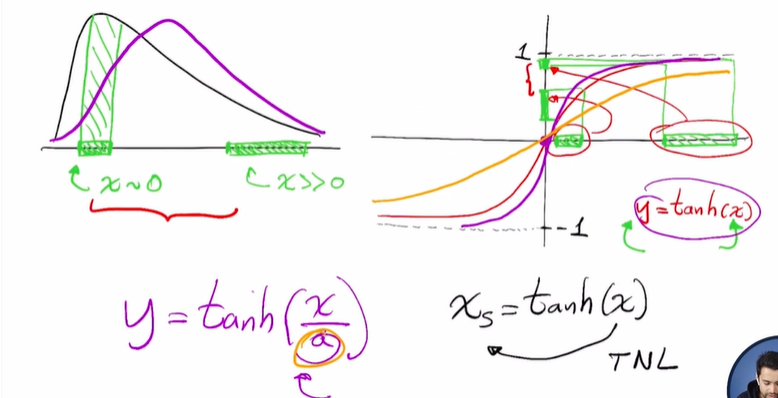

![Alt text](2023-02-18_23h24_52.png)

Transformación no lineal
¿Por qué usarlos?
En el caso donde haya datos fuertemente sesgados y no simétricos.
.

Algunos tipos:
Logística: los valores de la columna se transforman mediante la siguiente fórmula:
log
.

LogNormal: esta opción convierte todos los valores a una escala logarítmica normal. Los valores1 de la columna se transforman mediante la siguiente fórmula:
lognormal
Aquí μ y σ son los parámetros de la distribución, calculados empíricamente a partir de los datos como estimaciones de máxima verosimilitud, para cada columna por separado.

.

TanH: todos los valores se convierten a una tangente hiperbólica. Los valores de la columna se transforman mediante la siguiente fórmula:
Tha
.

¿Cuándo usarlos?
Justo antes de aplicar el escalamiento lineal, las transformaciones no lineales solo son para que nuestros datos queden lineales para luego aplicar la normalización lineal. Siempre se debe aplicar la normalización lineal.

## Procesamiento de datos numericos.

In [9]:
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]


(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

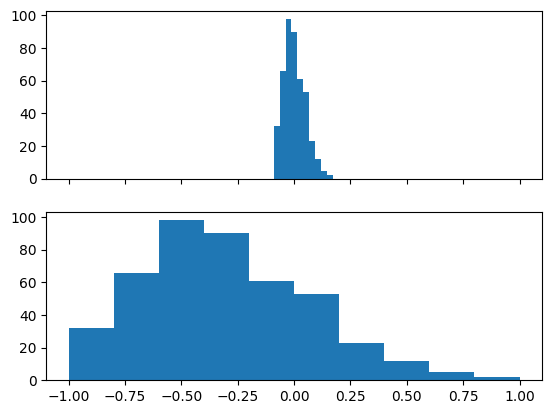

In [13]:
min_raw = min(raw)
max_raw = max(raw)
scaled = ((2*raw - max_raw - min_raw)/(max_raw - min_raw))
fig, axs = plt.subplots(2,1,sharex =  True) 
axs[0].hist(raw)
axs[1].hist(scaled)

In [17]:
#modelos para entrenamiento

def train_raw():
    linear_model.LinearRegression().fit(raw,y)
def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)
    

In [19]:
raw_time = timeit.timeit(train_raw,number = 100)
scaled_time = timeit.timeit(train_scaled, number = 100)
print(f'train raw: {raw_time}')
print(f'train scaled: {scaled_time}')

train raw: 0.10952819999999974
train scaled: 0.052055600000016966


(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

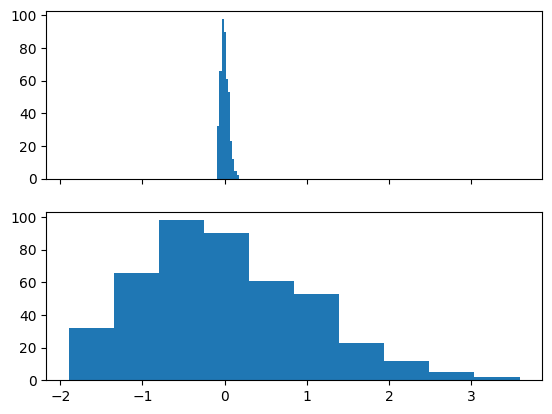

In [27]:
# Aplicando transformacion Z-score.

z_score = (raw - np.mean(raw))/np.std(raw)
fig , axs =  plt.subplots(2,1,sharex=  True)
axs[0].hist(raw)
axs[1].hist(z_score) 

In [28]:
def train_raw():
    linear_model.LinearRegression().fit(raw,y)
def train_z_score():
    linear_model.LinearRegression().fit(z_score, y)

In [31]:
raw_time = timeit.timeit(train_raw, number = 100)
z_score_time = timeit.timeit(train_z_score, number = 100)
print(f'train raw: {raw_time}')
print(f'train z_core: {z_score_time}')
print(f'train scaled: {scaled_time}')

train raw: 0.172532899999851
train z_core: 0.07507979999991221
train scaled: 0.052055600000016966


# Transformaciones  no lienales.

<AxesSubplot: >

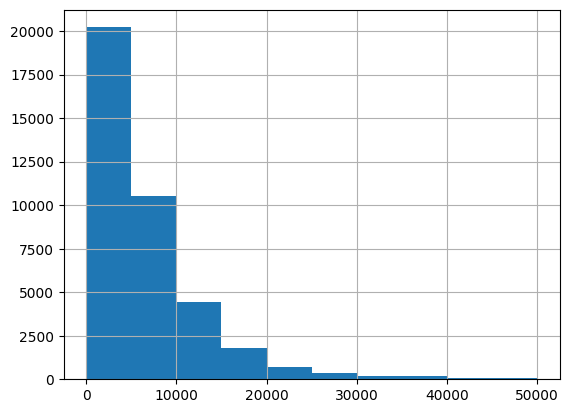

In [33]:
df_cars = pd.read_csv('cars.csv')
df_cars.price_usd.hist()

<AxesSubplot: >

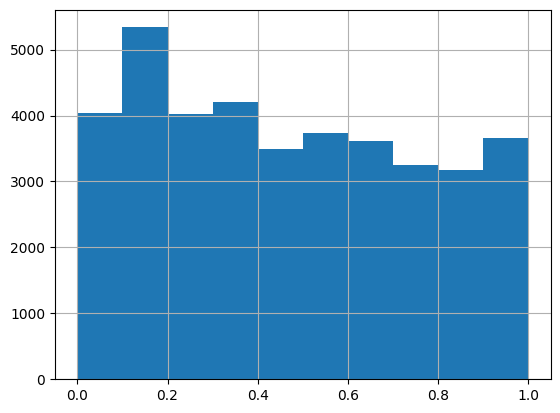

In [39]:
# Transformacion con tanh(x)
p = 10000
df_trans = df_cars.price_usd.apply(lambda x: np.tanh(x/10000))
df_trans.hist()

## Procesamiento de datos Categoricos.

Mapeos numericos.

Dummy.

-> Representacion compacta.
-> Mejor para inputs linealmente independientes.

One hot.

-> Permite describir categorias no incluidas inicialmente.

Cuando se tiene variables categóricas se hace un mapeo numérico. Para eso hay 2 métodos, de manera que sean fácilmente interpretables en modelos de machine learning:

Dummy : es la representación más compacta que se puede tener de los datos. Es mejor usarla cuando los inputs son variables linealmente independientes (no tienen un grado de correlación significativo). Es decir, las cuando se sabe que las categorías son independientes entre sí.
One-hot : es más extenso. Permite incluir categorías que no estaban en el dataset inicialmente. De forma que si se filtra una categoría que no estaba incluida, igual se pueda representar numéricamente y no de error en el modelo (este modelo es más cool y es el que se usa).
Hay errores en la notación de Pandas y los tratan como que ambos modelos son lo mismo, pero en la realidad el Dummy no se usa. Aún así, en Pandas el método es .get_dummies().


## Procesamiento de varibles categoricas en python

![Alt text](2023-02-21_22h23_56.png)

In [43]:
import pandas as pd

df = pd.read_csv('cars.csv')


array([[<AxesSubplot: title={'center': 'diesel'}>,
        <AxesSubplot: title={'center': 'electric'}>],
       [<AxesSubplot: title={'center': 'gasoline'}>, <AxesSubplot: >]],
      dtype=object)

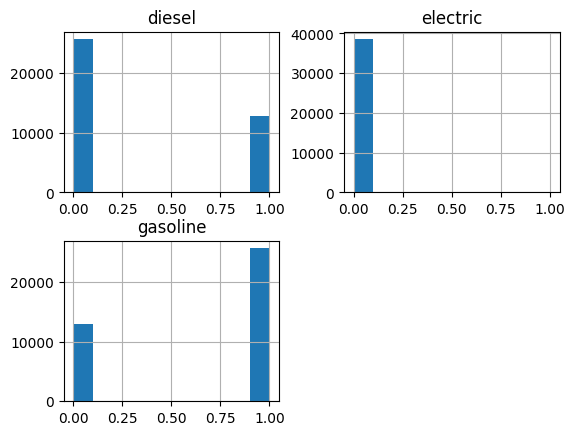

In [45]:
engine_one_hot = pd.get_dummies(df['engine_type'])

# Correlacion.


![Alt text](https://vscode-remote%2Bwsl-002bubuntu-002d22-002e04.vscode-resource.vscode-cdn.net/home/jann/Platzi/DataScience/EstadisticaDescriptiva/2023-02-21_22h40_14.png?version%3D1677037236253)

![Alt text](https://vscode-remote%2Bwsl-002bubuntu-002d22-002e04.vscode-resource.vscode-cdn.net/home/jann/Platzi/DataScience/EstadisticaDescriptiva/2023-02-21_22h41_26.png?version%3D1677037298309)

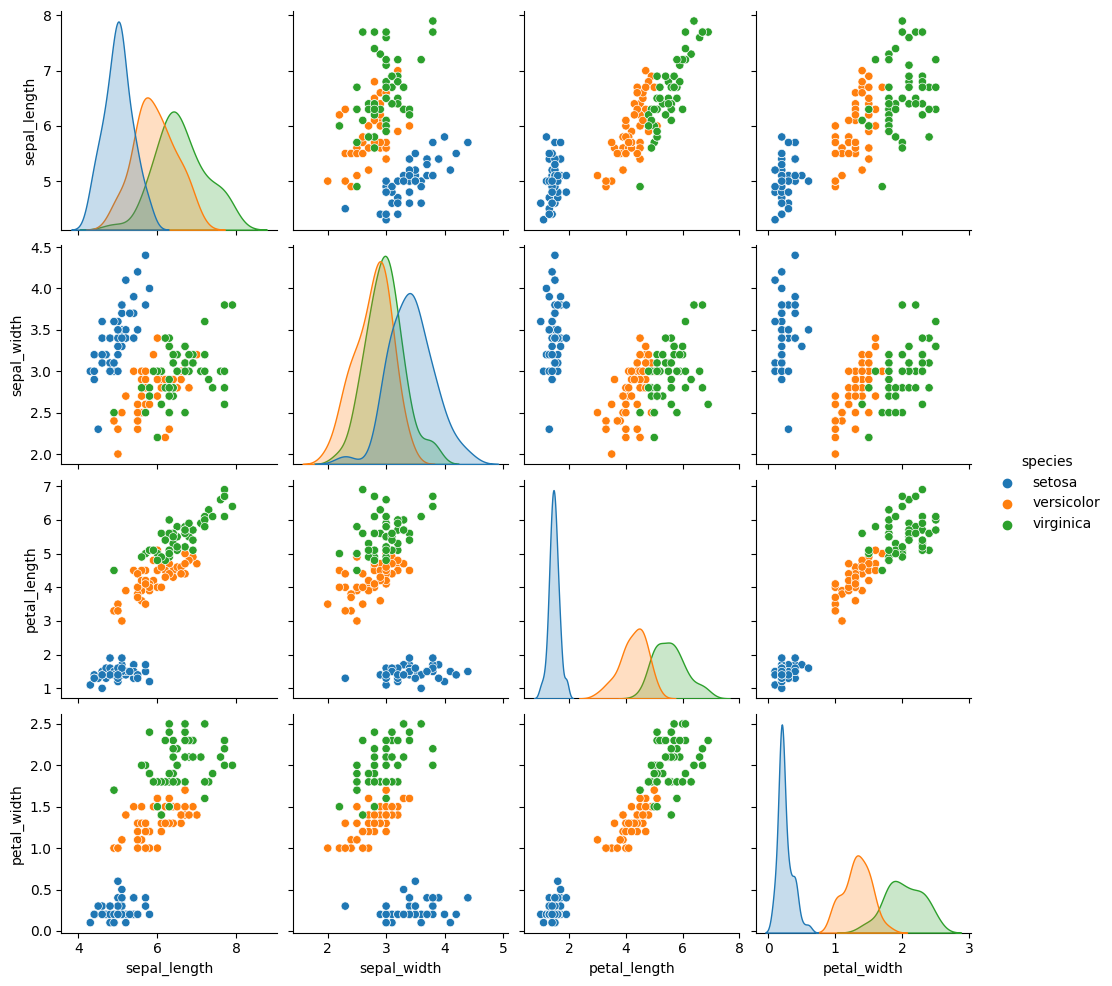

In [46]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

iris = sns.load_dataset('iris')
sns.pairplot(iris, hue = 'species')

/tmp/ipykernel_1228/431340947.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot = True)


<AxesSubplot: >

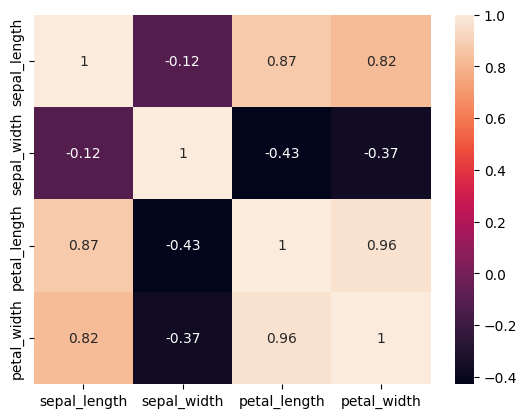

In [48]:

sns.heatmap(iris.corr(), annot = True)

# Proyeccion

![Alt text](2023-02-23_10h16_56.png)
![Alt text](2023-02-23_10h18_34.png)

# PCA analizis de componentes principales.

La matriz de convarianza es el objeto matematico que permite identificar cuales variables estan altamente correlacionadas.

Cuando dos variables están altamente correlacionadas, quiere decir que aportan básicamente la misma información del problema y eso podría indicar que solo necesitaríamos una sola de ellas. En la próxima clase veremos que esa reducción de variables se puede hacer con una técnica matemática denominada PCA (principal component analysis).

Esta técnica está basada en un concepto del álgebra de vectores y matrices, que llamamos el cálculo de los valores propios de una matriz, y en esta lectura profundizaremos sobre qué significa ese procedimiento.

Ahora bien, las matrices también tienen una operación de multiplicación entre ellas que es más compleja de definir que la suma, sin embargo aquí vamos a desglosarla. Vamos a reemplazar los elementos numéricos de las matrices del ejemplo anterior por variables algebraicas, indicando que pueden ser cualquier número para así exponer el proceso con la mayor generalidad posible. De esta manera, vamos a definir el producto de dos matrices cuadradas de tal manera que el resultado sea otra matriz de las mismas dimensiones así:

https://i.imgur.com/DOf9N1J.png
Donde cada expresión algebraica tiene la forma de dos índices que denotan la fila y columna donde está posicionado el número, respectivamente. Y la manera de calcular cada elemento de la matriz resultante viene dado por una regla sencilla que ilustraremos con el siguiente ejemplo:

https://i.imgur.com/pA7qH2a.png
Que equivale a decir que el elemento de la fila 1 y columna 1 de la matriz resultado se calcula como la suma de los productos de los elementos de la primera fila de la primera matriz por los elementos de la primera columna de la segunda matriz

https://i.imgur.com/pjuZwlE.png
Veamos otro ejemplo para tenerlo más claro:

https://i.imgur.com/2WoNK6j.png
En este caso el elemento de la fila 1 y columna 2 de la matriz resultado se calcula como la suma de los productos de los elementos de la primera fila de la primera matriz por los elementos de la segunda columna de la segunda matriz.

In [1]:
import numpy as np

In [4]:

A = np.array([[2, 4], [-1, 2]])
Ainversa = np.linalg.inv(A)
Ainversa

array([[ 0.25 , -0.5  ],
       [ 0.125,  0.25 ]])

In [6]:
np.matmul(A,Ainversa)

array([[1., 0.],
       [0., 1.]])

Repaso de Vectores
Como caso particular adicional a la definición anterior, consideremos el producto de una matriz cuadrada por un vector (aquí entendemos un vector como una matriz de una sola columna, también se le denomina por eso vectores columna en muchos libros de álgebra lineal) cuya longitud es igual al número de filas de la matriz así:

https://i.imgur.com/1aFGNYg.png
Donde definimos que el producto de una matriz por un vector resulta en otro vector de las mismas dimensiones (filas). Y la regla que consideramos para el caso de matrices cuadradas también aplica de manera que los elementos del vector resultante se obtendrían de multiplicar filas por columnas así:

https://i.imgur.com/9vuSATV.png
También tenemos una operación entre vectores que denominamos el producto punto o producto interior. Normalmente al considerar esta definición se representa el primer vector como una sola fila y el segundo como una sola columna así (sigamos pensando con base en el ejemplo anterior de la matriz por el vector, pero ahora la matriz solo tiene una fila):

https://i.imgur.com/596zIHK.png
Y como ya te estás dando cuenta (teniendo en mente la misma definición de multiplicación de matrices) al solo haber una fila en la primera matriz y una columna en la segunda matriz, el resultado solo podrá tener un elemento y es por esto que el resultado de multiplicar dos vectores de esta manera es siempre un número:

https://i.imgur.com/IGNqY7n.png
Simplifiquemos la notación así:

https://i.imgur.com/ONdFb8h.png
Y esto nos recuerda la clásica regla de multiplicar vectores como x por x más y por y. Y si los vectores tienen más dimensiones, entonces … más z por z y así. Recuerda que la notación simplificada es porque ahora tenemos que la primera componente es el eje X del vector y la segunda componente el eje Y del vector cuando lo dibujamos en un plano cartesiano.

https://i.imgur.com/bP7C40X.png
Ahora, cuando pensamos en multiplicar un vector por el mismo, la misma definición aplica:

https://i.imgur.com/doQIHFe.png
Y nos damos cuenta de que esto se relaciona con el Teorema de Pitágoras al ver que el producto de un vector por el mismo nos da el cuadrado de la longitud de la flecha que representa al vector en el plano cartesiano:

https://i.imgur.com/7441gI8.png
https://i.imgur.com/qzk7KN3.png
Así vemos que la longitud de un vector, también conocida como norma del vector se calcula como:

https://i.imgur.com/OUmWoRs.png
Listo, con esto terminamos un repaso básico de lo mínimo de matrices y vectores para lo que viene.

Vectores y Valores propios de una matriz
En álgebra lineal podemos tener ecuaciones donde la incógnita es un vector, supongamos la siguiente ecuación:

https://i.imgur.com/mee9AMt.png
Aquí A es una matriz cuadrada NxN cuyos elementos conocemos perfectamente y X es un vector columna cuyas componentes desconocemos. Aquí recordemos que multiplicar un vector por un número es simplemente multiplicar cada componente del vector por dicho número.

Entonces lo que esta ecuación nos pregunta es:

¿Existen vectores X tales que al multiplicarlos por la matriz A eso es equivalente a simplemente multiplicarlos por un número?

Si tal vector existe y está asociado a un valor específico de Λ, entonces decimos que el vector X es un vector propio de la matriz A y Λ es su valor propio correspondiente.

Consideremos esto para el caso de una matriz 2 x 2, como la siguiente:

https://i.imgur.com/5AlP07v.png
Esto se traduce en el sistema de ecuaciones (haciendo el producto matriz por vector):

https://i.imgur.com/LVyLKYe.png
Aquí entonces debemos encontrar las combinaciones de x e y, que satisfacen el sistema de ecuaciones. En general, hacer esto requiere otros conceptos más detallados del álgebra de matrices como el cálculo de determinantes y resolver ecuaciones polinomiales cuya explicación solo puede dejarse a un curso exclusivo de álgebra lineal. Pero no te preocupes, ya que podemos hacer este cálculo de manera rápida con python así:

import numpy as np

A = np.array([[1, 2], [1, 0]])
values, vectors = np.linalg.eig(A)
Donde la matriz A contiene los elementos exactos de la matriz anterior y el comando np.linalg.eig(A) lo que hace es calcular directamente los valores y vectores propios, llamados values y vectors en el código, respectivamente.

Verás que esta matriz tiene dos valores propios:

array([ 2., -1.])
Con sus respectivos vectores propios asociados:

array([[ 0.89442719, -0.70710678 ],
	[ 0.4472136 , 0.70710678 ]])
Aquí es importante anotar que los vectores que entrega la función np.linalg.eig(A) son vectores columna de manera que los elementos de la primera columna de vectors corresponden con el primer valor de values y así sucesivamente. Entonces en nuestro lenguaje matemático usual, escribimos las dos soluciones como:

vector_uno
vector_dos
Puedes verificar que cada vector y su respectivo valor propio cumplen la ecuación original ejecutando cada parte así:

np.matmul(A, vectors.T[1])
Que te da como resultado:

array([ 0.70710678, -0.70710678])
Mientras que por otro lado calculando:

values[1]*vectors.T[1]
Resulta en lo mismo:

array([ 0.70710678, -0.70710678])
Donde hemos considerado el segundo vector y valor propio respectivamente tomando λ = -1 y el vector incógnita X igual a vectors.T[1].

Uno de los hechos más importantes de obtener los vectores y valores propios de una matriz es poder diagonalizarla. En general se define que una matriz A es diagonalizable si es posible escribirla como el producto de:


Donde D es una matriz diagonal (matriz donde todos los elementos por fuera de la diagonal son cero), un ejemplo de matriz diagonal sería:


Y aquí un resultado matemático bien conocido es que si una matriz es diagonalizable, la matriz D se construye colocando sus valores propios en la diagonal y la matriz P se construye colocando en cada columna el vector propio,siguiendo el mismo orden de valores propios correspondientes de la matriz D, así:


Lo importante de estudiar este procedimiento en nuestro curso, es que cuando aplicamos este cálculo de vectores y valores propios a una matriz de covarianza, los vectores representan las direcciones a lo largo de las cuales percibimos la mayor cantidad de varianza de ese conjunto de datos, donde la cantidad de varianza es proporcional al valor propio de cada vector propio.

Y es importante tener en cuenta que este procedimiento aplica para un conjunto de datos con N variables al que le corresponde una matriz de covarianza de tamaño NxN.

Ahora, el último factor importante de esta técnica es que para matrices de covarianza, sus vectores propios siempre son independientes unos de otros y esto es justamente lo que queremos en un proceso de reducción de variables, porque direcciones independientes implica que estos vectores representan nuevas variables cuya correlación es la más baja posible y así cada nueva variable es lo más representativa posible.

En álgebra lineal se dice más precisamente que los vectores propios de una matriz de covarianza son ortogonales y esto quiere decir que el producto interno de cualquier par de estos vectores siempre da como resultado cero:


Como consecuencia la matriz se denomina matriz ortogonal, y se sabe en matemáticas que la inversa de una matriz ortogonal es igual a la transpuesta, de manera que:


En la próxima clase veremos esto de forma más detallada y visual, te veo allí.

# Reduccion de dimencionalidad

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

iris = sns.load_dataset('iris')

scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width','petal_length','petal_width']].values)

convariance_matrix = np.cov(scaled.T)
convariance_matrix


array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

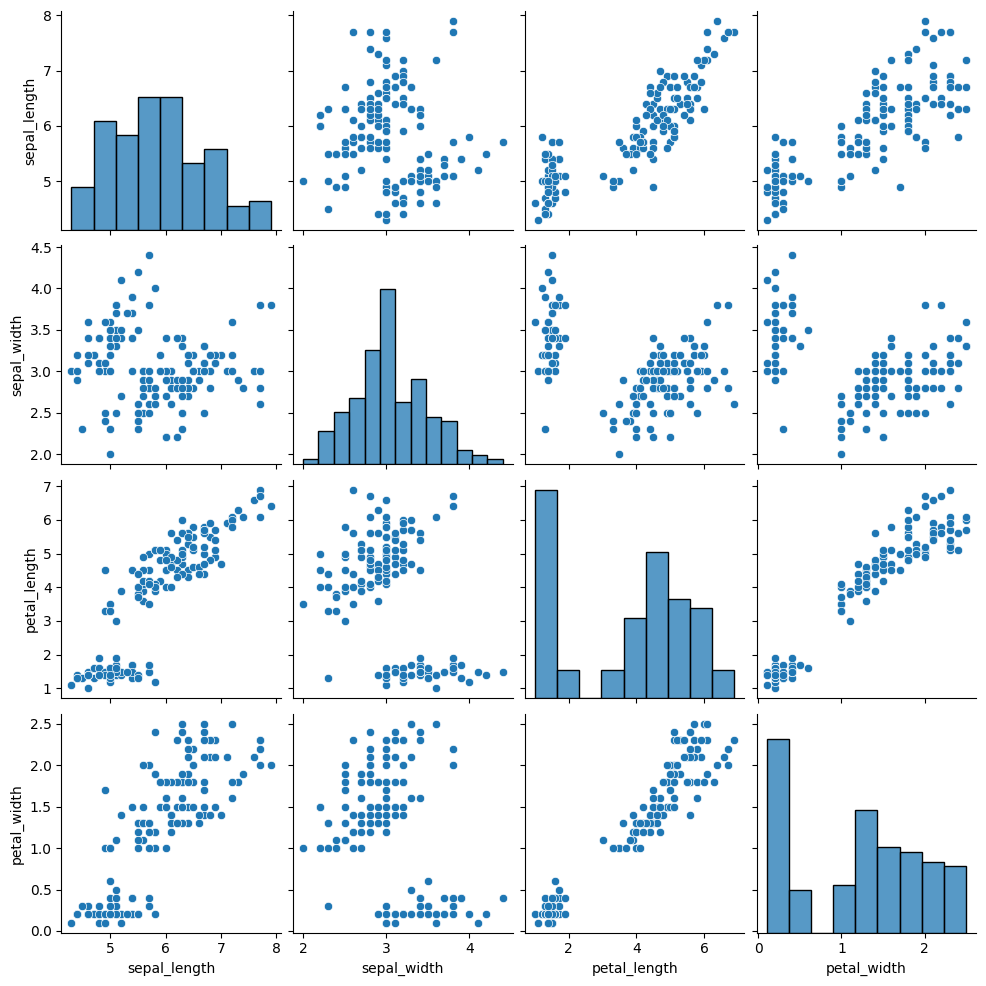

In [11]:
sns.pairplot(iris)

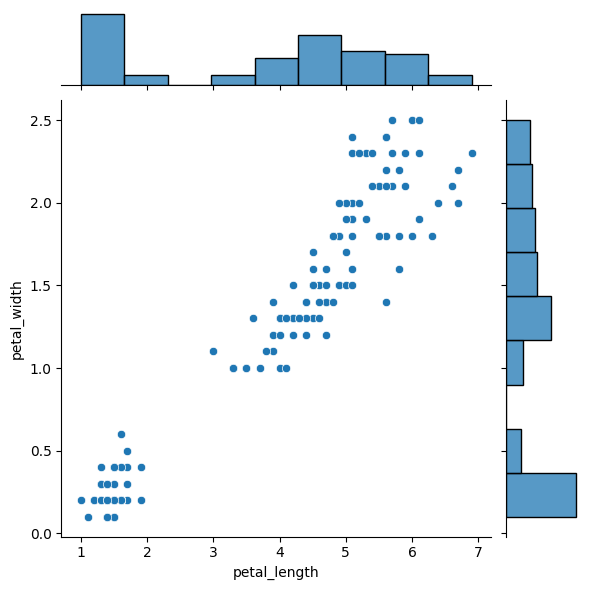

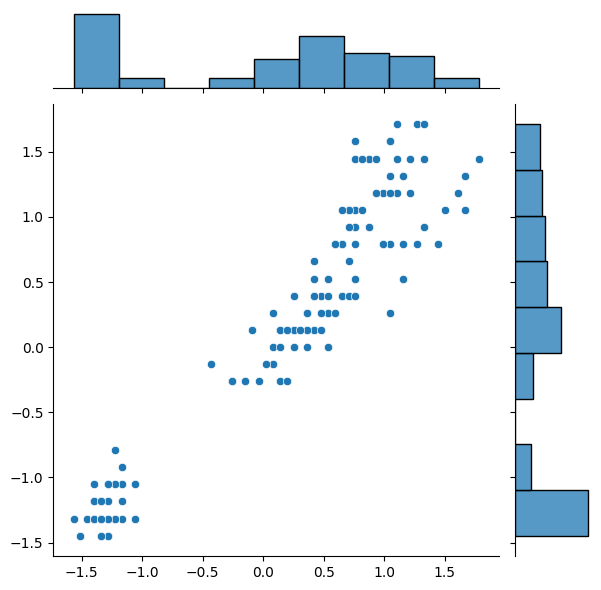

In [19]:
sns.jointplot(x = iris['petal_length'], y = iris['petal_width'])
sns.jointplot(x = scaled[:,2], y = scaled[:,3])

In [22]:
eigen_values, eigen_vectors = np.linalg.eig(convariance_matrix)
#Valores propios
eigen_values
#Vectores propios.
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [25]:
variance_explained = []
for i in eigen_values:
    variance_explained.append(i/sum(eigen_values)*100)
variance_explained

[72.9624454132999, 22.850761786701725, 3.668921889282867, 0.5178709107155016]

los vectores propios van a capturar la mayor varianza de los datos.
 

In [35]:
#Reducir dimenciones con sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled)

PCA(n_components=3)

In [27]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

In [29]:
reduce_scaled = pca.transform(scaled)
reduce_scaled


array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ],
       [-2.07563095,  1.48917752,  0.02696829],
       [-2.44402884,  0.0476442 ,  0.3354704 ],
       [-2.23284716,  0.22314807, -0.0886955 ],
       [-2.33464048, -1.11532768,  0.14507686],
       [-2.18432817, -0.46901356, -0.25376557],
       [-2.1663101 ,  1.04369065, -0.2686811 ],
       [-2.32613087,  0.13307834,  0.09375924],
       [-2.2184509 , -0.72867617, -0.23091124],
       [-2.6331007 , -0.96150673,  0.18079608],
       [-2.1987406 ,  1.86005711, -0.472901  ],
       [-2.26221453,  2.68628449,  0.03052661],
       [-2.2075877 ,  1.48360936, -0.00534409],
       [-2.19034951,  0.48883832, -0.04421532],
       [-1.898572  ,  1.40501879, -0.37434327],
       [-2.34336905,  1.12784938,  0.13263047],
       [-1.914323  ,  0.40885571, -0.421

In [43]:
iris['pca_1'] = reduce_scaled[:,0]
iris['pca_2'] = reduce_scaled[:,1]
iris['pca_3'] =  scaled[:,2]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pca_1,pca_2,pca_3
0,5.1,3.5,1.4,0.2,setosa,-2.264703,0.480027,-1.340227
1,4.9,3.0,1.4,0.2,setosa,-2.080961,-0.674134,-1.340227
2,4.7,3.2,1.3,0.2,setosa,-2.364229,-0.341908,-1.397064
3,4.6,3.1,1.5,0.2,setosa,-2.299384,-0.597395,-1.283389
4,5.0,3.6,1.4,0.2,setosa,-2.389842,0.646835,-1.340227


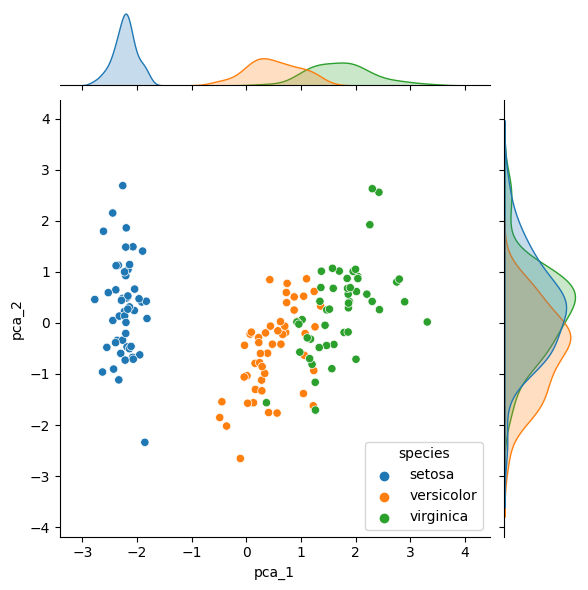

In [44]:
sns.jointplot(data = iris, 
              x = 'pca_1', 
              y = 'pca_2',
              hue='species')